# Setup

In [37]:
import pandas as pd
import plotly.express as px

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# I - Análise dos commits coletados

In [ ]:
commits_df = pd.read_csv('/content/merged_commits_11-11-2025_12-57-06.csv')
print(commits_df.shape)
commits_df.head()

(258, 10)


,repo,sha,author,date,message,url,stars,contributors,description,total_commits
0,tolgraven/tolgrAVen,3f5011a0e8f2dd4f260c7d3474215460d9c90548,Joen Tolgraven,2025-09-22T23:38:38.000+02:00,project: remove node-sass,https://github.com/tolgraven/tolgrAVen/commit/...,1.0,1.0,Code for my website at https://tolgraven.se,1264.0
1,dwp/retirement-maintain,0203997f12d501c5437c481733254871c40e9b83,Gemma Leigh,2016-01-12T14:33:49.000Z,Merge pull request #119 from alphagov/remove-n...,https://github.com/dwp/retirement-maintain/com...,1.0,1.0,NaN,7965.0
2,Eddayy/Eddayy.github.io,e1bcc7404a95aca0a3ffec68642107e325d27edc,Edmund Tay,2025-08-25T14:41:58.000+08:00,Merge pull request #105 from Eddayy/renovate/n...,https://github.com/Eddayy/Eddayy.github.io/com...,1.0,1.0,My personal website,278.0
3,AndriySikora/ionic2,ac55ae96cd917c09190c212ab2cb060a3b317826,Andriy Sikora,2025-09-24T11:57:21.000+02:00,Merge pull request #11 from AndriySikora/depen...,https://github.com/AndriySikora/ionic2/commit/...,0.0,1.0,Ionic2 app,14.0
4,enara28/enara_itzala,c248d503b5aef0e66ec6cc2fdeb3d4712b2bd8b9,enara28,2025-09-18T12:32:22.000+02:00,cambio node-sass por sass,https://github.com/enara28/enara_itzala/commit...,0.0,0.0,NaN,16.0


**OBSERVAÇÃO:** Foram coletados 1000 commits ao todo e, após remoção de duplicações, restaram 258 commits.

## A) Data dos commits

In [ ]:
commits_df['date'].isna().sum()

np.int64(0)

In [ ]:
"""
/tmp/ipython-input-4197088347.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  commits_df["date"] = pd.to_datetime(commits_df["date"])
"""
commits_df["date"] = pd.to_datetime(commits_df["date"], utc=True)

In [ ]:
commits_df.dtypes

,0
repo,object
sha,object
author,object
date,"datetime64[ns, UTC]"
message,object
url,object
stars,float64
contributors,float64
description,object
total_commits,float64


In [ ]:
commits_df['year'] = commits_df['date'].dt.year
commits_df["year"].value_counts().sort_index()

,count
year,
2015,1
2016,1
2022,4
2025,252


## B) Mensagens dos commits

In [ ]:
all_messages = " ".join(commits_df['message'].astype(str))

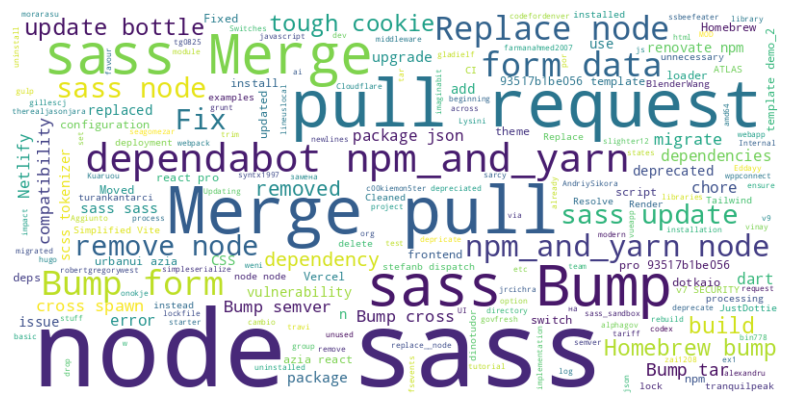

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="viridis").generate(all_messages)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# II - Leitura dos dados dos repositórios

In [6]:
forked_repos_df = pd.read_csv('/content/forked_repos.csv')
common_repos_df = pd.read_csv('/content/common_repos_increased.csv')
forked_repos_df.shape, common_repos_df.shape

((1, 259), (174, 66))

# III - Limpeza e preparação dos dados (common repos)

## Remoção de atributos secundários

In [ ]:
# verificando se o conteúdo das colunas é o mesmo para remover uma delas
forks_check = common_repos_df['forks'] == common_repos_df['forks_count']
forks_check.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
# verificando se o conteúdo das colunas é o mesmo para remover uma delas
open_issues_check = common_repos_df['open_issues_count'] == common_repos_df['open_issues']
open_issues_check.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [7]:
empty_cols = [
    'status', 'documentation_url', 'message', 'organization/gravatar_id', 'mirror_url'
]

cols_to_drop = [
    # 'html_url',
    'contributors_url', #campo já foi usado para coletar contributors
    'merges_url', 'network_count', 'watchers', 'organization/url', 'organization/html_url', 'organization/organizations_url',
    'description', 'url', 'fork', 'events_url', 'assignees_url', 'languages_url', 'stargazers_url', 'organization/repos_url',
    'subscribers_url', 'subscription_url', 'deployments_url', 'open_issues', 'size', 'organization/followers_url',
    'pushed_at', 'forks',
    'organization/events_url', 'organization/received_events_url', 'organization/user_view_type', 'organization/site_admin',
    'organization/login', 'organization/id', 'organization/node_id', 'organization/avatar_url', 'organization/following_url',
    'organization/gists_url', 'organization/starred_url', 'organization/subscriptions_url',
    'branches_url', 'tags_url', 'has_wiki', 'has_pages', 'has_discussions', 'web_commit_signoff_required', 'topics'
]

cols_to_drop.extend(empty_cols)

common_repos_df.drop(columns=cols_to_drop, inplace=True)
common_repos_df.shape

(174, 19)

## Conversão de tipos

In [8]:
common_repos_df["created_at"] = pd.to_datetime(common_repos_df["created_at"])
common_repos_df["updated_at"] = pd.to_datetime(common_repos_df["updated_at"])

## Salvando versão após limpeza

In [9]:
common_repos_df.to_csv('common_repos_clean.csv', index=False)

# IV - Análise dos projetos alcançados (apenas infos principais para o artigo)

## 1. Dados gerais

In [11]:
common_repos_df.head()

,full_name,html_url,downloads_url,created_at,updated_at,stargazers_count,language,has_issues,has_projects,has_downloads,forks_count,archived,disabled,open_issues_count,default_branch,subscribers_count,organization/type,commits_count,contr_count
0,tolgraven/tolgrAVen,https://github.com/tolgraven/tolgrAVen,https://api.github.com/repos/tolgraven/tolgrAV...,2020-09-26 21:41:47+00:00,2025-11-11 09:27:46+00:00,1.0,Clojure,True,True,True,0.0,False,False,31.0,master,1.0,NaN,1309.0,1
1,dwp/retirement-maintain,https://github.com/dwp/retirement-maintain,https://api.github.com/repos/dwp/retirement-ma...,2023-11-21 14:39:26+00:00,2025-09-20 11:37:24+00:00,1.0,HTML,True,True,True,1.0,False,False,1.0,main,2.0,Organization,7965.0,30
2,Eddayy/Eddayy.github.io,https://github.com/Eddayy/Eddayy.github.io,https://api.github.com/repos/Eddayy/Eddayy.git...,2018-12-19 01:37:29+00:00,2025-08-25 06:44:46+00:00,1.0,JavaScript,True,True,True,0.0,False,False,14.0,development,1.0,NaN,278.0,4
3,AndriySikora/ionic2,https://github.com/AndriySikora/ionic2,https://api.github.com/repos/AndriySikora/ioni...,2017-02-15 14:53:28+00:00,2025-09-24 09:57:25+00:00,0.0,TypeScript,True,True,True,0.0,False,False,11.0,master,1.0,NaN,14.0,2
4,sasmi825/portfolio-website,https://github.com/sasmi825/portfolio-website,https://api.github.com/repos/sasmi825/portfoli...,2025-04-22 18:59:45+00:00,2025-11-06 02:27:10+00:00,0.0,TypeScript,True,True,True,0.0,False,False,0.0,main,1.0,NaN,18.0,1


In [10]:
common_repos_df.dtypes

,0
full_name,object
html_url,object
downloads_url,object
created_at,"datetime64[ns, UTC]"
updated_at,"datetime64[ns, UTC]"
stargazers_count,float64
language,object
has_issues,bool
has_projects,bool
has_downloads,bool


In [12]:
common_repos_df.isna().sum()

,0
full_name,0
html_url,0
downloads_url,0
created_at,0
updated_at,0
stargazers_count,0
language,1
has_issues,0
has_projects,0
has_downloads,0


## 2. Atributos quantitativos

### Sumário estatístico

In [14]:
common_repos_df.drop(columns=['subscribers_count'], inplace=True)

common_repos_df.describe()

,stargazers_count,forks_count,open_issues_count,commits_count,contr_count
count,174.000000,174.000000,174.000000,174.000000,174.000000
mean,101.729885,84.212644,9.994253,16820.517241,4.597701
std,1131.092940,1001.765099,46.567186,104766.952305,7.629362
min,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,26.000000,1.000000
50%,0.000000,0.000000,0.000000,66.000000,2.000000
75%,1.000000,0.000000,7.000000,164.750000,3.000000
max,14796.000000,13189.000000,584.000000,716191.000000,30.000000


## 3. Atributos categóricos

### a) Linguagem principal

In [15]:
common_repos_df["language"].value_counts()

,count
language,
JavaScript,76
TypeScript,26
HTML,16
SCSS,16
Vue,15
CSS,10
Ruby,5
PHP,4
Clojure,1


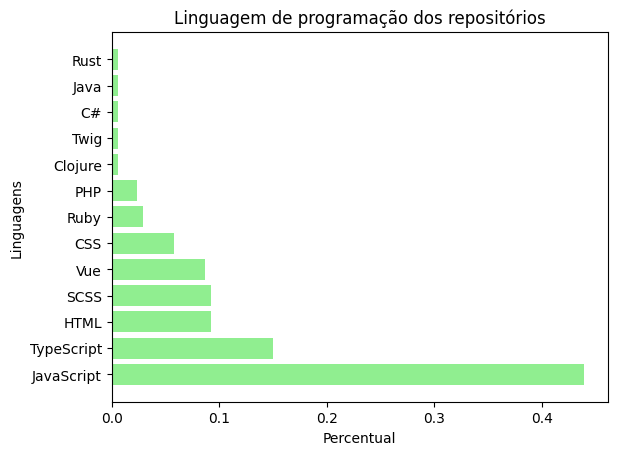

In [ ]:
lang_labels = common_repos_df["language"].value_counts().index
# para valores absolutos
# lang_count = common_repos_df["language"].value_counts().values
# para valores percentuais
lang_count = common_repos_df["language"].value_counts(normalize=True).values

# # Vertical Bar Plot
# plt.bar(lang_labels, lang_count, color='skyblue')
# plt.xlabel('Linguagens')
# plt.ylabel('Qtde')

# Horizontal Bar Plot
plt.barh(lang_labels, lang_count, color='lightgreen') # lightgreen
# plt.xlabel('Qtde')
plt.xlabel('Percentual')
plt.ylabel('Linguagens')

plt.title('Linguagem de programação dos repositórios')
plt.show()

### b) Número de estrelas (Stars)

In [16]:
common_repos_df["stargazers_count"].value_counts()

,count
stargazers_count,
0.0,121
1.0,16
2.0,9
3.0,7
12.0,3
6.0,3
4.0,2
14796.0,1
18.0,1


In [17]:
without_stars = common_repos_df[common_repos_df["stargazers_count"] == 0]
with_stars = common_repos_df[common_repos_df["stargazers_count"] != 0]
star_perc = round(without_stars.shape[0]/common_repos_df.shape[0]*100, 2)
without_stars.shape, with_stars.shape, star_perc, round(100 - star_perc,2)

((121, 18), (53, 18), 69.54, 30.46)

**Projetos com maior número de estrelas**

In [19]:
with_stars.sort_values("stargazers_count", ascending=False).head(5)

,full_name,html_url,downloads_url,created_at,updated_at,stargazers_count,language,has_issues,has_projects,has_downloads,forks_count,archived,disabled,open_issues_count,default_branch,organization/type,commits_count,contr_count
5,Homebrew/homebrew-core,https://github.com/Homebrew/homebrew-core,https://api.github.com/repos/Homebrew/homebrew...,2016-03-01 06:58:36+00:00,2025-11-11 15:31:00+00:00,14796.0,Ruby,True,False,True,13189.0,False,False,79.0,main,Organization,716191.0,30
63,apache/atlas,https://github.com/apache/atlas,https://api.github.com/repos/apache/atlas/down...,2017-07-22 07:00:08+00:00,2025-11-10 02:44:48+00:00,2021.0,Java,False,True,True,898.0,False,False,102.0,master,Organization,4021.0,30
81,PaystackHQ/nigerialogos,https://github.com/PaystackHQ/nigerialogos,https://api.github.com/repos/PaystackHQ/nigeri...,2019-01-14 17:32:03+00:00,2025-10-27 14:50:57+00:00,288.0,SCSS,True,True,True,266.0,False,False,3.0,master,Organization,702.0,30
110,govfresh/govpress,https://github.com/govfresh/govpress,https://api.github.com/repos/govfresh/govpress...,2014-01-13 01:08:50+00:00,2025-09-20 03:09:46+00:00,136.0,PHP,True,True,True,51.0,False,False,11.0,master,Organization,185.0,6
104,Ocelot-Social-Community/Ocelot-Social,https://github.com/Ocelot-Social-Community/Oce...,https://api.github.com/repos/Ocelot-Social-Com...,2020-10-04 14:37:59+00:00,2025-11-01 15:37:44+00:00,107.0,TypeScript,True,True,True,50.0,False,False,584.0,master,Organization,16804.0,30


**Todos são de organizações, e não projetos individuais.**

## 4. Tempo de vida dos repositórios

### a) Ano de criação dos repositórios

In [50]:
common_repos_df['year'] = common_repos_df['created_at'].dt.year
common_repos_df["year"].value_counts().sort_index()

,count
year,
2014,2
2015,4
2016,3
2017,7
2018,13
2019,24
2020,37
2021,11
2022,13


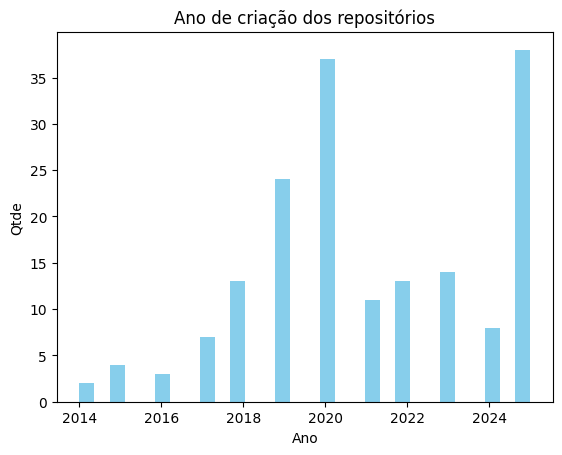

In [54]:
# common_repos_df["year"].plot(kind="hist", bins=30)

plt.hist(common_repos_df["year"], bins=30, color='skyblue') # lightgreen
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.title('Ano de criação dos repositórios')
plt.show()

In [58]:
common_repos_df["year"].describe()

,year
count,174.000000
mean,2021.068966
std,2.872203
min,2014.000000
25%,2019.000000
50%,2020.000000
75%,2024.000000
max,2025.000000


In [65]:
common_repos_df[common_repos_df["year"] == 2014]

,full_name,html_url,downloads_url,created_at,updated_at,stargazers_count,language,has_issues,has_projects,has_downloads,...,archived,disabled,open_issues_count,default_branch,organization/type,commits_count,contr_count,year,duration,year_up
110,govfresh/govpress,https://github.com/govfresh/govpress,https://api.github.com/repos/govfresh/govpress...,2014-01-13 01:08:50+00:00,2025-09-20 03:09:46+00:00,136.0,PHP,True,True,True,...,False,False,11.0,master,Organization,185.0,6,2014,4268 days 02:00:56,2025
161,agross/git-reveal,https://github.com/agross/git-reveal,https://api.github.com/repos/agross/git-reveal...,2014-11-18 17:38:13+00:00,2025-07-29 06:03:34+00:00,12.0,JavaScript,True,False,True,...,False,False,9.0,gh-pages,NaN,2473.0,30,2014,3905 days 12:25:21,2025


### b) Duração dos projetos

In [59]:
common_repos_df["duration"] = common_repos_df["updated_at"] - common_repos_df["created_at"]
common_repos_df["duration"]

,duration
0,1871 days 11:45:59
1,668 days 20:57:58
2,2441 days 05:07:17
3,3142 days 19:03:57
4,197 days 07:27:25
...,...
169,77 days 21:39:50
170,3567 days 13:51:46
171,2955 days 19:54:28
172,3043 days 11:12:50


In [60]:
common_repos_df["duration"].describe()

,duration
count,174
mean,1511 days 20:32:30.028735648
std,1075 days 19:15:52.548775600
min,0 days 00:15:31
25%,581 days 10:40:13.250000
50%,1821 days 19:59:35
75%,2200 days 15:40:09.500000
max,4268 days 02:00:56


In [38]:
fig = px.timeline(common_repos_df, x_start="created_at", x_end="updated_at", y="full_name") # , color="Resource"
# fig.update_yaxes(autorange="reversed") # Optional: reverse the y-axis order
fig.show()

### c) Ano da última atualização

In [56]:
common_repos_df['year_up'] = common_repos_df['updated_at'].dt.year

common_repos_df["year_up"].value_counts().sort_index()

,count
year_up,
2023,1
2025,173


In [57]:
common_repos_df[common_repos_df["year_up"] == 2023]

,full_name,html_url,downloads_url,created_at,updated_at,stargazers_count,language,has_issues,has_projects,has_downloads,...,archived,disabled,open_issues_count,default_branch,organization/type,commits_count,contr_count,year,duration,year_up
33,ipatch/homebrew-core-catalina,https://github.com/ipatch/homebrew-core-catalina,https://api.github.com/repos/ipatch/homebrew-c...,2023-06-29 21:05:58+00:00,2023-06-29 23:10:54+00:00,0.0,Ruby,True,True,True,...,False,False,2.0,main-ipatch-cat,NaN,666593.0,30,2023,0 days 02:04:56,2023


O projeto cuja última atualização é de 2023 não está `desabilitado` e nem `arquivado`.

Acessando o repositório acima (https://github.com/ipatch/homebrew-core-catalina), os dados não parecem convergir.

## Organization

In [64]:
common_repos_df["organization/type"].isna().sum()

np.int64(147)

In [63]:
common_repos_df["organization/type"].value_counts()

,count
organization/type,
Organization,27


## Status

In [66]:
common_repos_df["archived"].value_counts(sort=True)

,count
archived,
False,173
True,1


In [68]:
common_repos_df[common_repos_df["archived"]]

,full_name,html_url,downloads_url,created_at,updated_at,stargazers_count,language,has_issues,has_projects,has_downloads,...,archived,disabled,open_issues_count,default_branch,organization/type,commits_count,contr_count,year,duration,year_up
25,seagomezar/sebastian-gomez,https://github.com/seagomezar/sebastian-gomez,https://api.github.com/repos/seagomezar/sebast...,2015-01-18 19:58:31+00:00,2025-09-09 22:00:17+00:00,1.0,SCSS,True,True,True,...,True,False,0.0,master,NaN,40.0,3,2015,3887 days 02:01:46,2025


In [67]:
common_repos_df["disabled"].value_counts(sort=True)

,count
disabled,
False,174


- O atributo de status é totalmente nulo e pode ser removido
- Temos os campos disabled e archived, mas apenas um repositório está com o segundo status.